# Test project on cleaning data. 

We are gonna start by importing all neccesary packages for the excersice. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score



We proceed to load the data, in this case it will be a database with gender statistics for the Ratio of female to male labor force participation rate (%) (modeled ILO estimate) of different countries. 

In [106]:
dataset_url = 'Gender_data.csv'
data = pd.read_csv(dataset_url)
data.head()

,Series Name,Series Code,Country Name,Country Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Afghanistan,AFG,19.0495022175564,19.5895371326682,20.2664693437509,21.622491259185,23.07292148994,24.6200696996542,26.2840635684821,28.0631556853817,28.6666579520661,28.9252325847449
1,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Albania,ALB,72.7589290777712,73.1632502874508,73.6203240094535,70.7199203213307,69.2918307787245,72.2262257052856,72.1490439616252,72.1710705215709,72.3054824987412,72.3454361704051
2,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Algeria,DZA,20.5257143293109,21.9300379200855,23.4411074834285,24.0492077020865,22.7581100188966,22.5204651337503,22.2615534428831,21.9160267479987,21.5594969832597,21.6470828861895
3,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..
4,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Andorra,AND,..,..,..,..,..,..,..,..,..,..


We remove the columns that do not give any useful information for analysis and rename the other ones to make improve readibility. We also replace all the missing values

In [107]:
data.drop(['Series Name','Series Code', 'Country Code'], axis=1, inplace=True)
data.columns = ["Country", '2010', '2011', '2012','2013','2014', '2015', '2016', '2017', '2018', '2019']
data = data.replace([".."], 0)
data.dropna(axis=0, inplace=True)
data.set_index('Country', inplace=True)
data.head()


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Afghanistan,19.0495022175564,19.5895371326682,20.2664693437509,21.622491259185,23.07292148994,24.6200696996542,26.2840635684821,28.0631556853817,28.6666579520661,28.9252325847449
Albania,72.7589290777712,73.1632502874508,73.6203240094535,70.7199203213307,69.2918307787245,72.2262257052856,72.1490439616252,72.1710705215709,72.3054824987412,72.3454361704051
Algeria,20.5257143293109,21.9300379200855,23.4411074834285,24.0492077020865,22.7581100188966,22.5204651337503,22.2615534428831,21.9160267479987,21.5594969832597,21.6470828861895
American Samoa,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0


We see what data type is each column and if any modifications are neccesary. 

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2010    217 non-null    object
 1   2011    217 non-null    object
 2   2012    217 non-null    object
 3   2013    217 non-null    object
 4   2014    217 non-null    object
 5   2015    217 non-null    object
 6   2016    217 non-null    object
 7   2017    217 non-null    object
 8   2018    217 non-null    object
 9   2019    217 non-null    object
dtypes: object(10)
memory usage: 18.6+ KB


In [86]:
data[data.columns[1:]] = data[data.columns[1:]].astype('float')
print(data.dtypes)




2010     object
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
dtype: object


In [87]:
data.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,60.825227,61.163861,61.303096,61.436044,61.658655,61.827175,61.944220,62.159956,62.203991
std,30.402376,30.493396,30.463427,30.478488,30.502813,30.555098,30.660788,30.773933,30.786588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.632416,49.744959,50.750624,52.129315,52.035930,50.537682,50.867522,49.988267,50.313188
50%,72.444012,72.003319,72.129271,72.308436,72.496767,72.417970,72.685236,73.617207,73.714966
75%,82.593303,82.858887,82.897167,83.347627,83.349008,83.885242,83.918275,84.092547,84.337681
max,103.811382,103.887603,103.963282,104.045818,103.799161,103.606476,103.470246,104.173599,104.142512


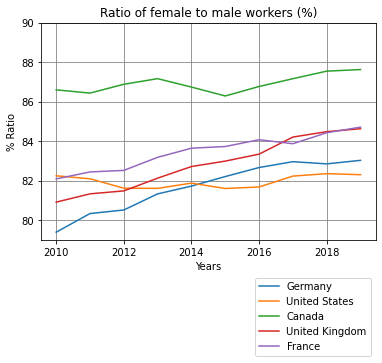

In [104]:
years = list(map(str,range(2010,2020)))
data.loc['Germany', years].astype('float').plot(kind='line')
data.loc['United States',years].astype('float').plot(kind='line')
data.loc['Canada',years].astype('float').plot(kind='line')
data.loc['United Kingdom',years].astype('float').plot(kind='line')
data.loc['France',years].astype('float').plot(kind='line')
pl.title("Ratio of female to male workers (%)")
pl.ylabel("% Ratio")
pl.xlabel("Years")
pl.grid(color='gray')
pl.ylim(79,90)
pl.legend(bbox_to_anchor=(0, -0.15, 1, 0))
pl.show()



AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'